<a href="https://colab.research.google.com/github/Rishika70/NLP/blob/main/sentinment_analysis_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the data

In [ ]:
train  = pd.read_csv('/content/drive/MyDrive/train_2kmZucJ.csv')
test = pd.read_csv('/content/drive/MyDrive/test_oJQbWVk.csv')

In [ ]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
#Combine test and train data for our convenience.

combi = train.append(test, ignore_index=True)


<ipython-input-17-cbc76e721910>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test, ignore_index=True)


## Remove Twitter Handle

In [ ]:
#Remove unwanted pattern from the tweets.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

In [ ]:
#new column tidy_tweet, it will contain the cleaned and processed tweets.
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")


## Removing Punctuations, Numbers, and Special Characters

In [ ]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-20-7266f6bf6f90>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


## Removing Short Words

In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https MfQV #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


##Tokenization

In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#fingerprint, #Pregnancy, Test, https, MfQV, ...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, #talk, #makememories, #unp...
3    [wired, know, George, made, that, #iphone, #cu...
4    [What, amazing, service, Apple, even, talk, ab...
Name: tidy_tweet, dtype: object

##Stemming

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#fingerprint, #pregnanc, test, http, mfqv, #a...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, #talk, #makememori, #unplug...
3    [wire, know, georg, made, that, #iphon, #cute,...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: tidy_tweet, dtype: object

In [ ]:
## Now let’s stitch these tokens back together.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

##Let’s visualize all the words our data using the wordcloud plot.

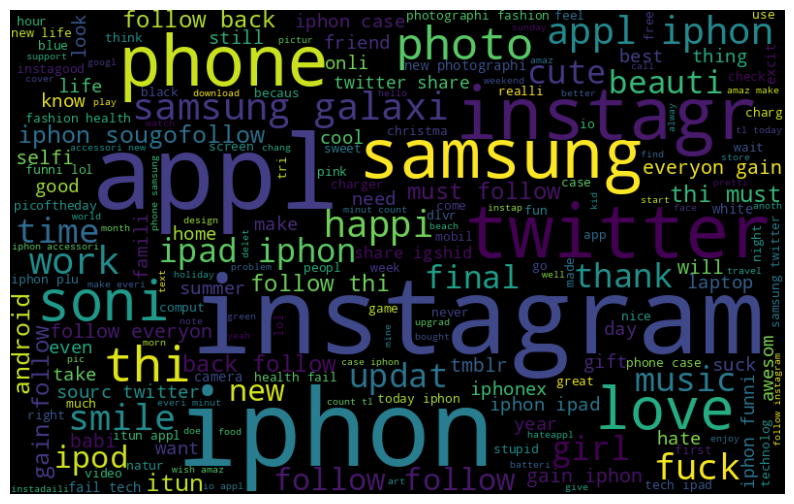

In [ ]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()